# Project Tatyana

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
train = pd.read_csv('D:\\projeler\\project Titanic\\train.csv')
test = pd.read_csv('D:\\projeler\\project Titanic\\test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Analyse dataset (train data)

In [ ]:
train.head(2)

In [ ]:
train.describe()

In [ ]:
train.info()

In [ ]:
train.isnull().sum()

### Visulaation analyse data 

#### statistical information

In [ ]:
sns.histplot(x="Pclass", data=train)

In [ ]:
sns.histplot(x="Sex", data=train)

In [ ]:
sns.histplot(x="Age", data=train)

In [ ]:
sns.histplot(x="SibSp", data=train)

In [ ]:
sns.histplot(x="Parch", data=train)

In [ ]:
sns.histplot(x="Fare", data=train)

In [ ]:
sns.histplot(x="Embarked", data=train)

### link between values

#### survived with...

In [ ]:
sns.countplot(x='Survived',data=train, hue='Pclass')

In [ ]:
sns.countplot(x='Survived',data=train,hue='Sex')

In [ ]:
sns.countplot(x='Survived',data=train,hue='SibSp')

In [ ]:
sns.countplot(x='Survived',data=train,hue='Parch')

In [ ]:
sns.countplot(x='Survived',data=train,hue='Embarked')

#### Embarked with...

In [ ]:
sns.countplot(x='Pclass',data=train,hue='Sex')

In [ ]:
sns.countplot(x='Pclass',data=train,hue='SibSp')

In [ ]:
sns.countplot(x='Pclass',data=train,hue='Parch')

In [ ]:
sns.countplot(x='Pclass',data=train,hue='Embarked')

#### Sex with...

In [ ]:
sns.countplot(x='Sex',data=train,hue='SibSp')

In [ ]:
sns.countplot(x='Sex',data=train,hue='Parch')

In [ ]:
sns.countplot(x='Sex',data=train,hue='Embarked')

#### SibSp with...

In [ ]:
sns.countplot(x='SibSp',data=train,hue='Parch')

In [ ]:
sns.countplot(x='SibSp',data=train,hue='Embarked')

In [ ]:
sns.countplot(x='Parch',data=train,hue='Embarked')

#### Pclass via Fare

In [ ]:
sns.displot(train[train['Pclass']==1].Fare)

In [ ]:
sns.displot(train[train['Pclass']==2].Fare)

In [ ]:
sns.displot(train[train['Pclass']==3].Fare)

In [ ]:
sns.heatmap(train[['Survived', 'Pclass', 'Age', 'SibSp', 
                  'Parch', 'Fare']].corr(), annot=True)

### data preprocessing

In [5]:
train['train_test'] = 1
test['train_test'] = 0
test["Survived"] = np.NaN
titanic_passenger = pd.concat([train, test])

In [6]:
titanic_passenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [7]:
titanic_passenger.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

In [8]:
titanic_passenger['Fare'] = np.log(titanic_passenger['Fare']+1)

In [9]:
titanic_passenger.dropna(subset=['Embarked'], inplace=True)

In [10]:
titanic_passenger['Age'] = titanic_passenger.Age.fillna(titanic_passenger.
                        Age.median());

In [11]:
titanic_passenger['Fare'] = titanic_passenger.Fare.fillna(titanic_passenger.
                        Fare.median())

In [12]:
titanic_passenger['Pclass'] = titanic_passenger['Pclass'].astype(str)

In [13]:
titanic_passenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   object 
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        293 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1307 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 143.0+ KB


In [14]:
vector_ID = pd.get_dummies(titanic_passenger[['Pclass', 'Sex', 'Age', 'SibSp', 
                            'Parch', 'Fare', 'Embarked', 'train_test']])

In [15]:
vector_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1307 non-null   float64
 1   SibSp       1307 non-null   int64  
 2   Parch       1307 non-null   int64  
 3   Fare        1307 non-null   float64
 4   train_test  1307 non-null   int64  
 5   Pclass_1    1307 non-null   uint8  
 6   Pclass_2    1307 non-null   uint8  
 7   Pclass_3    1307 non-null   uint8  
 8   Sex_female  1307 non-null   uint8  
 9   Sex_male    1307 non-null   uint8  
 10  Embarked_C  1307 non-null   uint8  
 11  Embarked_Q  1307 non-null   uint8  
 12  Embarked_S  1307 non-null   uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 71.5 KB


In [16]:
vector_ID

,Age,SibSp,Parch,Fare,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,1,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,1,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,2.202765,0,0,0,1,0,1,0,0,1
414,39.0,0,0,4.699571,0,1,0,0,1,0,1,0,0
415,38.5,0,0,2.110213,0,0,0,1,0,1,0,0,1
416,28.0,0,0,2.202765,0,0,0,1,0,1,0,0,1


In [17]:
X_tr = vector_ID[vector_ID.train_test == 1].drop(['train_test'], axis=1)
X_tr.shape

(889, 12)

In [18]:
X_ts = vector_ID[vector_ID.train_test == 0].drop(['train_test'], axis=1)
X_ts.shape

(418, 12)

In [20]:
y_tr = titanic_passenger[titanic_passenger.train_test == 1].Survived
y_tr.shape

(889,)

### Machine learning

##### import scikit-learn modules

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, 
                                    test_size=0.2)

#### LogisticRegression

In [23]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
print("Train score: ", lr.score(X_train, y_train))
print("Test score: ", lr.score(X_test, y_test))

Train score:  0.7988748241912799
Test score:  0.797752808988764


#### Random Forest

In [24]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
print("Train score: ", rf.score(X_train, y_train))
print("Test score: ", rf.score(X_test, y_test))

Train score:  0.9845288326300985
Test score:  0.7752808988764045


### GridSearch

#### LogisticRegression

In [25]:
params = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
lr = LogisticRegression()
lr_grid = GridSearchCV(lr, param_grid=params, cv=5, verbose = True, n_jobs = -1)
lr_grid.fit(X_train, y_train)
print(lr_grid.best_score_)
print(lr_grid.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.8073377326898452
LogisticRegression(C=0.03359818286283781, max_iter=2000, solver='liblinear')


In [26]:
lr_best = lr_grid.best_estimator_

In [27]:
print("Train scores: ", lr_best.score(X_train, y_train))
print("Test scores: ", lr_best.score(X_test, y_test))

Train scores:  0.8129395218002813
Test scores:  0.7921348314606742


In [28]:
y_predict = lr_best.predict(X_ts).astype(int)
PassID = test['PassengerId']

In [29]:
submission_lr = pd.DataFrame({'PassengerId': PassID, 'Survived': y_predict})

In [30]:
submission_lr.to_csv('D:\\Titanic.csv', index=False)

In [31]:
sumbission_lr = pd.read_csv('D:\\Titanic.csv')

In [32]:
submission_lr

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot: xlabel='Survived', ylabel='Count'>

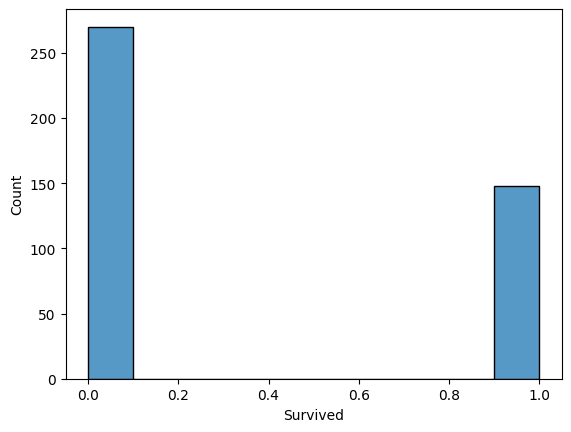

In [33]:
sns.histplot(x='Survived', data=submission_lr)

In [34]:
sumbission = pd.read_csv('D:\\projeler\\project Titanic\\gender_submission.csv')

<AxesSubplot: xlabel='Survived', ylabel='Count'>

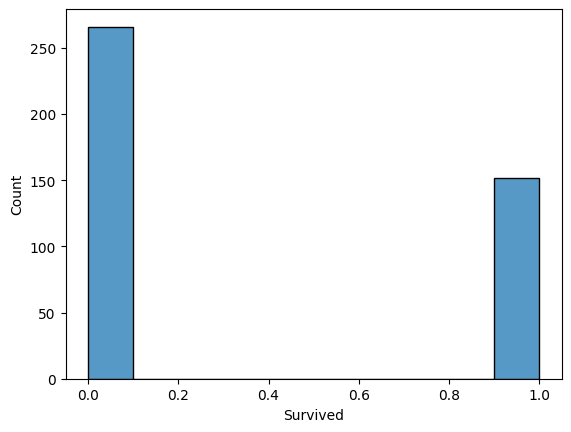

In [35]:
sns.histplot(x='Survived', data=sumbission)